### 목표
 - 유방암 데이터를 통해서 유방암 유/무 판단
 - DecisionTree 모델사용
  - 특성 선택해보기

In [ ]:
# /content/drive/MyDrive/폴리텍전남캠퍼스/data/diabetes.csv


In [1]:
import pandas as pd
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/폴리텍전남캠퍼스/data/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.head() # 최근 5개 데이터 출력해 주세요


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# 데이터 크기 확인
data.shape

(768, 9)

In [8]:
# 문제데이터 : class를 제외한 모든 컬럼
X= data.iloc[:,:-1]
# 정답데이터 : class 컬럼
y = data.iloc[:,-1]

In [9]:
X.shape , y.shape

((768, 8), (768,))

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [11]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [12]:
from sklearn.model_selection import train_test_split
#train_test_split(문제,답지)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size= 0.3,
                                                 random_state=42)

In [13]:
X_train.shape, y_train.shape

((537, 8), (537,))

In [14]:
X_test.shape, y_test.shape

((231, 8), (231,))

In [15]:
# 모델 생성
from sklearn.tree import DecisionTreeClassifier

In [16]:
# 모델 객체를 생성
tree_model = DecisionTreeClassifier()

In [17]:
# 모델학습
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
# 예측
pre = tree_model.predict(X_test)

In [21]:
import numpy as np
# 정확도 평가
# accuracy_score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,pre)
print('score',np.round(acc_score*100,2))
print('score {:,.2f} / {}%입니다'.format(acc_score*100,acc_score))

score 72.29
score 72.29 / 0.7229437229437229%입니다


In [23]:
import graphviz

In [24]:
# 모델 모양 출력파일 만들기
from sklearn.tree import export_graphviz

export_graphviz(tree_model,# 학습된 모델의 이름
                out_file = '/content/drive/MyDrive/폴리텍전남캠퍼스/data/tree.dot',# 출력파일 이름
                class_names = ['양성','음성'],# 정답 이름
                feature_names = X.columns, # 특징의 이름
                impurity = True, # 불순도 gini
                filled =True, # 노드의 색상 출력
                )

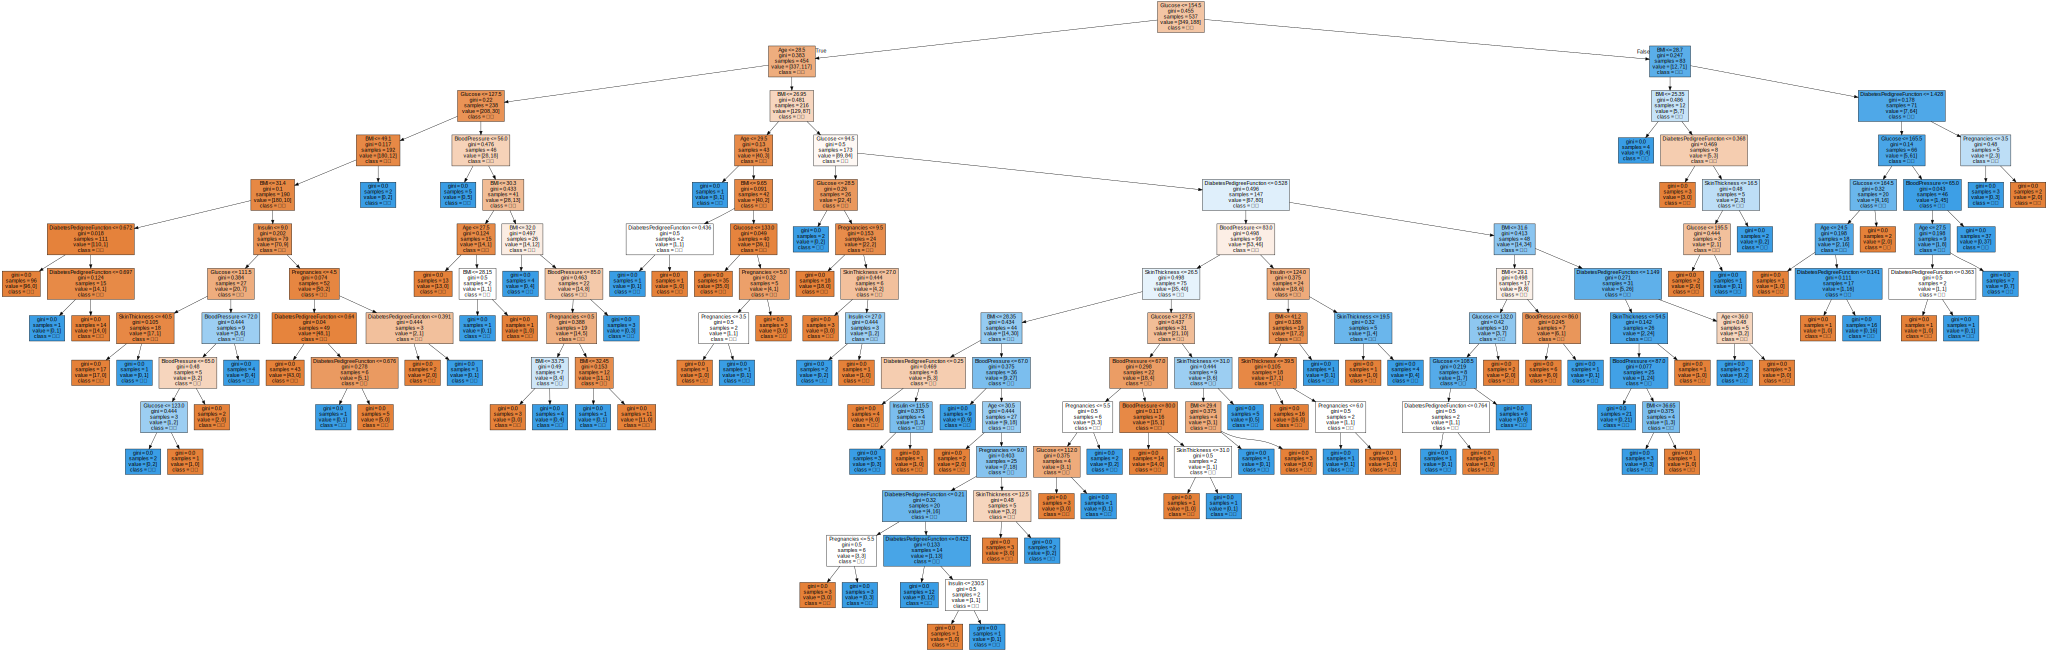

In [25]:
# 모델 출력하기
with open('/content/drive/MyDrive/폴리텍전남캠퍼스/data/tree.dot', encoding='UTF8') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [26]:
# 모델 객체를 생성
tree_model2 = DecisionTreeClassifier(max_depth=3)

In [27]:
# tree_model2.fit
# 모델 학습
tree_model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
# tree2.dot 파일 생성
export_graphviz(tree_model2,# 학습된 모델의 이름
                # out_file = '/content/drive/MyDrive/폴리텍전남캠퍼스/data/tree2.dot',# 출력파일 이름
                out_file = 'tree2.dot',# 출력파일 이름
                class_names = ['양성','음성'],# 정답 이름
                feature_names = X.columns, # 특징의 이름
                impurity = True, # 불순도 gini
                filled =True, # 노드의 색상 출력
                )

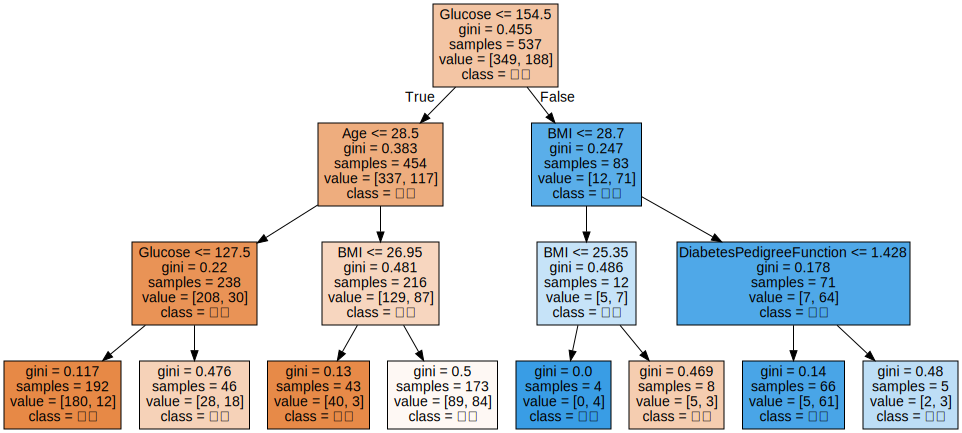

In [31]:
# 모델 출력하기
with open('/content/tree2.dot', encoding='UTF8') as f:
  dot_graph2 = f.read()

display(graphviz.Source(dot_graph2))

In [30]:
# tree_model2.score
score = tree_model2.score(X_test,y_test)
score

0.7186147186147186

In [32]:
pre2 = tree_model2.predict(X_test)

In [33]:
import numpy as np
# 정확도 평가
# accuracy_score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,pre2)
print('score',np.round(acc_score*100,3))
print('score {:,.2f} / {:,.2f}%입니다'.format(acc_score*100,acc_score))

score 71.861
score 71.86 / 0.72%입니다


In [34]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

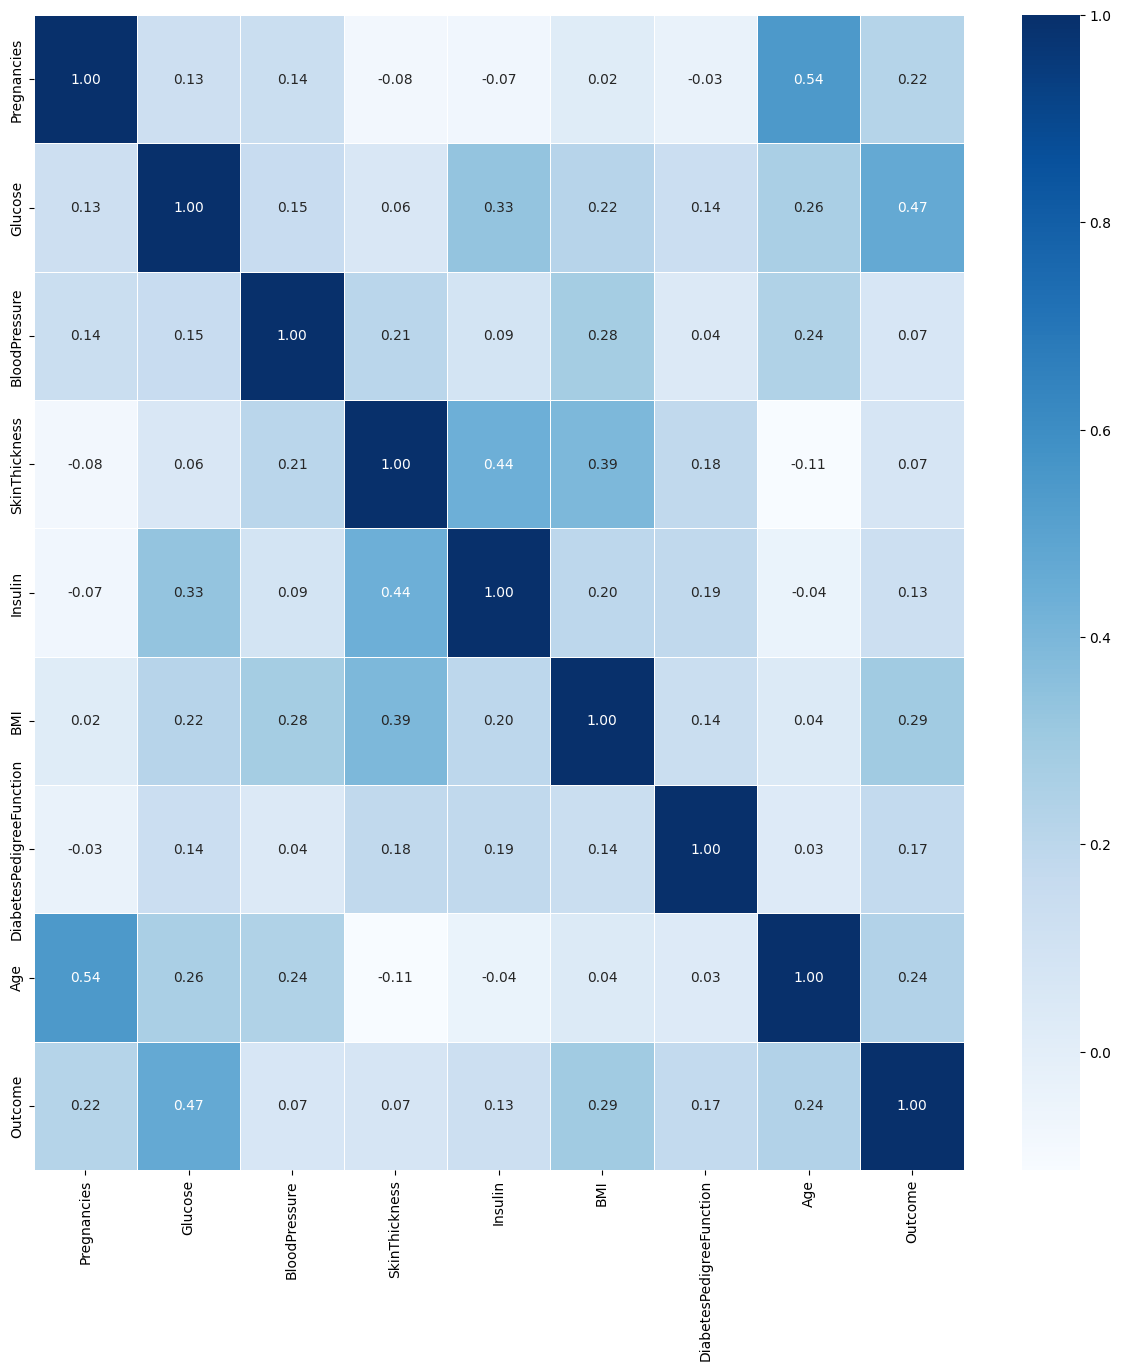

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data= data.corr(), annot=True,
            fmt='.2f', linewidths=.5,cmap='Blues')